In [2]:
import pandas as pd

df = pd.read_excel("../data/Telco_customer_churn.xlsx")
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [6]:
df.shape
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [8]:
df['Churn Value'].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

In [9]:
df['Churn Value'].value_counts(normalize=True) * 100


Churn Value
0    73.463013
1    26.536987
Name: proportion, dtype: float64

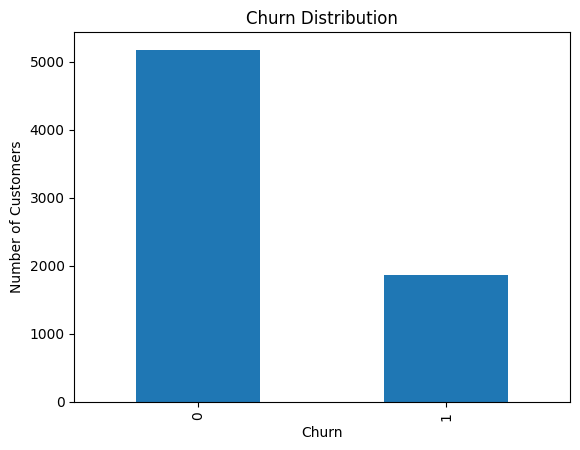

In [10]:
import matplotlib.pyplot as plt

df['Churn Value'].value_counts().plot(kind='bar')
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()


In [11]:
df.isnull().sum().sort_values(ascending=False)

Churn Reason         5174
Online Security         0
CLTV                    0
Churn Score             0
Churn Value             0
Churn Label             0
Total Charges           0
Monthly Charges         0
Payment Method          0
Paperless Billing       0
Contract                0
Streaming Movies        0
Streaming TV            0
Tech Support            0
Device Protection       0
Online Backup           0
CustomerID              0
Count                   0
Multiple Lines          0
Phone Service           0
Tenure Months           0
Dependents              0
Partner                 0
Senior Citizen          0
Gender                  0
Longitude               0
Latitude                0
Lat Long                0
Zip Code                0
City                    0
State                   0
Country                 0
Internet Service        0
dtype: int64

In [13]:
df['Churn Reason'] = df['Churn Reason'].fillna("Not Churned")
df['Churn Reason'].isnull().sum()

np.int64(0)

In [17]:
print(df['Total Charges'].dtype)
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
print(df['Total Charges'].dtype)
df['Total Charges'].isnull().sum()



float64
float64


np.int64(11)

## Analysis based on contract type


In [18]:
churn_by_contract = df.groupby('Contract')['Churn Value'].mean() * 100
churn_by_contract

Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Churn Value, dtype: float64